# Datos anteriores

In [10]:
import pandas as pd

datos = pd.read_csv("data/datos.csv")
datos.sample(5)

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
11749,21,0,76,8,1,200,1.597552
3458,13,0,62,8,6,700,1.737314
1158,11,0,34,8,12,788,1.751371
49930,35,1,57,2,6,788,1.609006
23,11,0,25,8,12,1000,1.726496


# Cuartiles, deciles y percentiles

Las medidas de localización nos permiten entender como se distribuye un conjunto de datos y entregan un análisis con valores relativos diferentes de las medidas de tendencia central. Es posible observar el comportamiento y cómo tiende a estar el conjunto de datos.

Hay una serie de medidas de posición similares en su diseño a la mediana, aunque no son medidas de tendencia central. Como se sabe, la mediana divide la distribución en dos partes iguales en términos del número de elementos en cada parte. Los cuartiles, por otro lado, permiten que la distribución se divida en cuatro partes iguales en términos del número de elementos en cada uno; deciles en diez partes y centiles en cien partes iguales.

## Cuartiles de `Ingreso`

In [11]:
datos.Ingreso.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Ingreso, dtype: float64

- Hasta un 25% de la base de datos tiene un salario de 788
- Sobre el 50% de la base de datos tiene un salario de 1200
- Sobre el 75% de la base de datos tiene un salario de 2000

## Deciles de `Ingreso`

In [12]:
deciles = [i/10 for i in range(1, 10)]

In [13]:
datos.Ingreso.quantile(deciles)

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Ingreso, dtype: float64

## Percentiles de `Ingreso`

In [14]:
percentiles = [i/100 for i in range(1,100)]

In [15]:
datos.Ingreso.quantile(percentiles)

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Ingreso, Length: 99, dtype: float64

## Graficar

### Histograma

/var/folders/45/nnwdvrcs63j3c_75jxv__q_80000gn/T/ipykernel_94021/1660319130.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Edad,


<Axes: title={'center': 'Distribución de Frecuencia Acumulada'}, xlabel='Años', ylabel='Acumulado'>

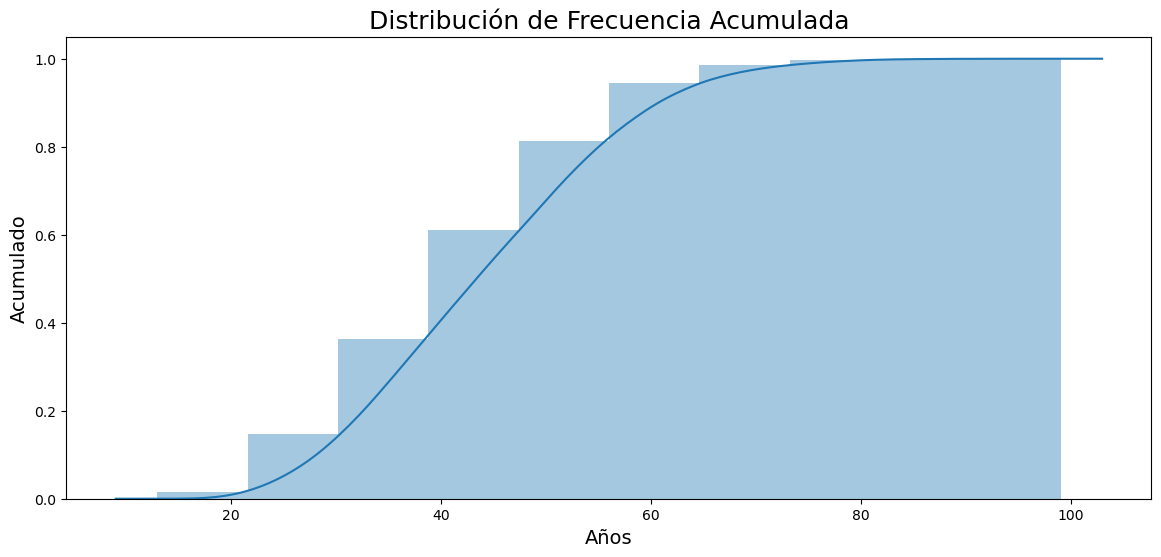

In [16]:
import seaborn as sns
import scipy

# hist_kws para que sea acumulativo
# kde_kws para ver densidad
# bins para mostrar los deciles (10 barras)
ax = sns.distplot(datos.Edad, 
                  hist_kws={'cumulative': True}, 
                  kde_kws={'cumulative': True}, 
                  bins=10)

ax.figure.set_size_inches(14,6)
ax.set_title('Distribución de Frecuencia Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Años', fontsize=14)
ax

In [17]:
datos.Edad.quantile(deciles)

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: Edad, dtype: float64

### Boxplot

El box plot da una idea de la posición, dispersión, asimetría, colas y valores extremos. La posición central está dada por la mediana y la dispersión por  𝐼𝐼𝑄  (distancia inter cuartil). Las posiciones relativas de  𝑄1 ,  𝑀𝑒𝑑𝑖𝑎𝑛𝑎  y  𝑄3  dan una idea de la simetría de la distribución. Las longitudes de las colas están dadas por las líneas que van desde el rectángulo a los valores remotos y por los valores extremos.

- Dispersión ⇨ distancia intercuartil

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img005.png' width='65%'>

<Axes: title={'center': 'Altura'}, xlabel='Metros'>

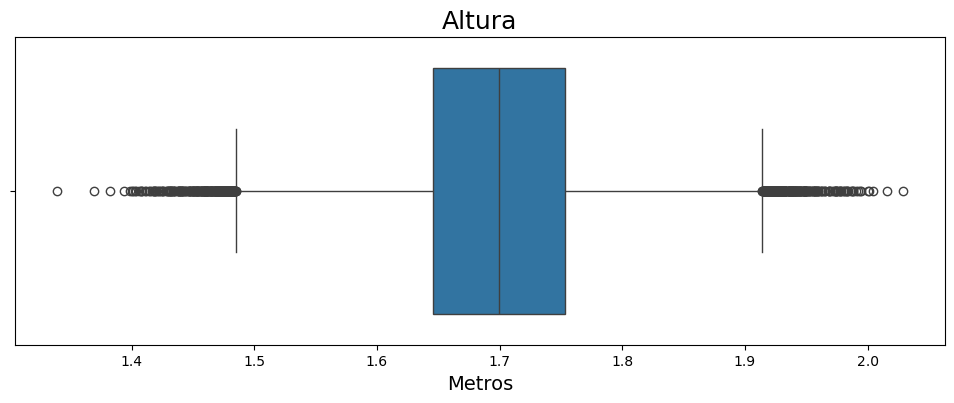

In [18]:
ax = sns.boxplot(x = 'Altura', data=datos, orient='h')

ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

> Se puede ver un comportamiento simétrico

<Axes: title={'center': 'Altura por sexo'}, xlabel='Metros', ylabel='Sexo'>

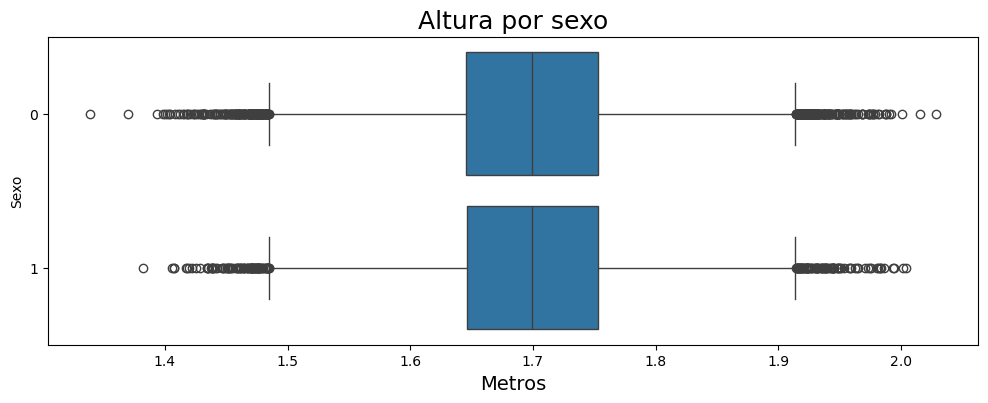

In [ ]:
ax = sns.boxplot(x='Altura', y='Sexo',data=datos, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Altura por sexo', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: title={'center': 'Ingreso'}, xlabel='Miles de pesos'>

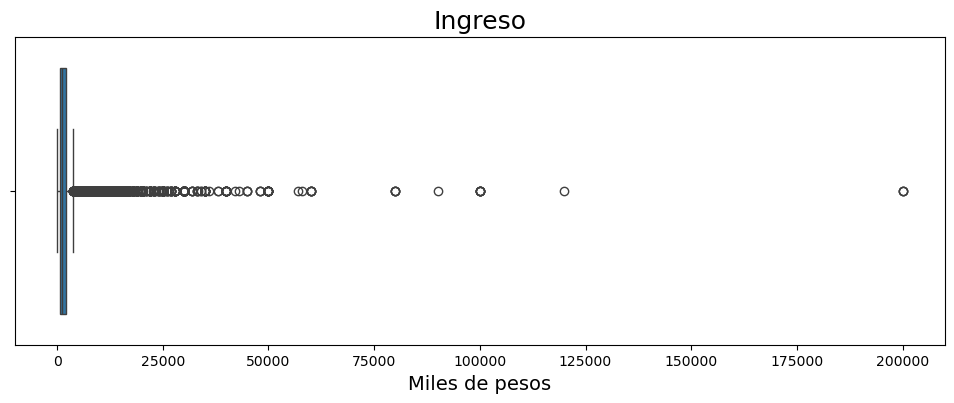

In [20]:
ax = sns.boxplot(x="Ingreso", data=datos, orient="h")

ax.figure.set_size_inches(12, 4)
ax.set_title("Ingreso", fontsize=18)
ax.set_xlabel("Miles de pesos", fontsize=14)
ax

<Axes: title={'center': 'Ingreso'}, xlabel='Miles de pesos'>

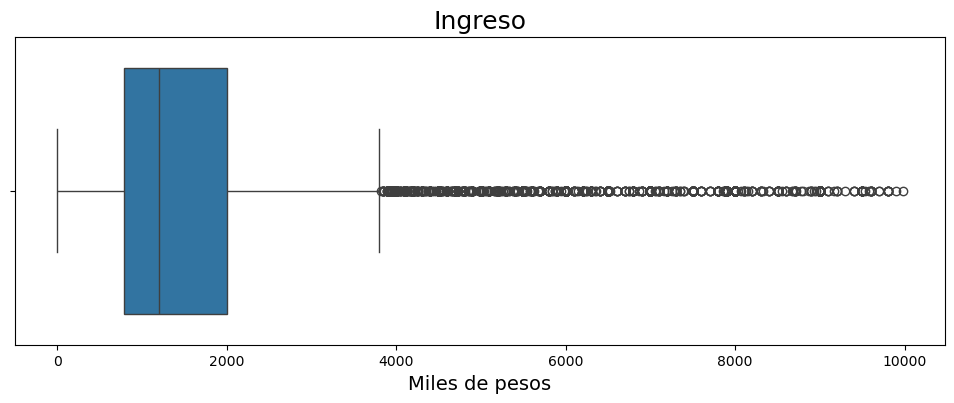

In [23]:
# Será necesario hacer 'zoom', ingresos se concentran muy en el rango bajo
ax = sns.boxplot(x="Ingreso", data=datos.query('Ingreso < 10000'), orient="h")

ax.figure.set_size_inches(12, 4)
ax.set_title("Ingreso", fontsize=18)
ax.set_xlabel("Miles de pesos", fontsize=14)
ax

> No se observan outliers inferiores, porque el sueldo mínimo es 0, sería muy extraño encontrar un salario negativo.

Por otro lado los outliers superiores superan el límite superios, es necesario tomar este detalle en cuenta para que al hacer un analisis descriptivo no sea afectado por estos outliers.

<Axes: title={'center': 'Ingreso'}, xlabel='Miles de pesos', ylabel='Sexo'>

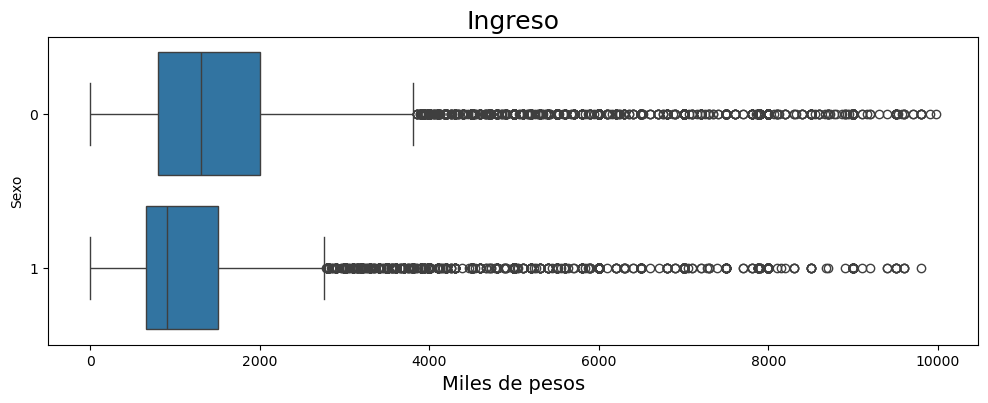

In [24]:
ax = sns.boxplot(x="Ingreso", y='Sexo', data=datos.query("Ingreso < 10000"), orient="h")

ax.figure.set_size_inches(12, 4)
ax.set_title("Ingreso", fontsize=18)
ax.set_xlabel("Miles de pesos", fontsize=14)
ax

Se ve que el sexo masculino tiene mayor salario mínimo que el femenino (estas se encuentran más cerca al límite inferior).

<Axes: title={'center': 'Años de Estudio'}, xlabel='Años'>

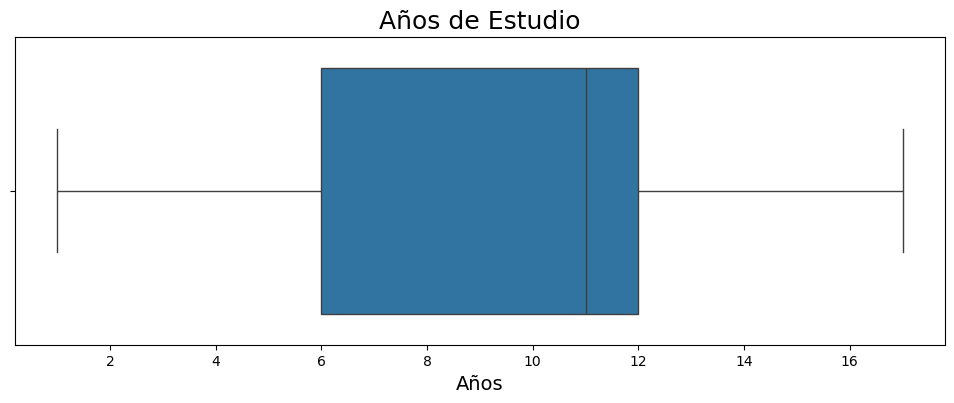

In [26]:
ax = sns.boxplot(x="Años de Estudio", data=datos, orient="h")

ax.figure.set_size_inches(12, 4)
ax.set_title("Años de Estudio", fontsize=18)
ax.set_xlabel("Años", fontsize=14)
ax

<Axes: title={'center': 'Años de Estudio'}, xlabel='Años', ylabel='Sexo'>

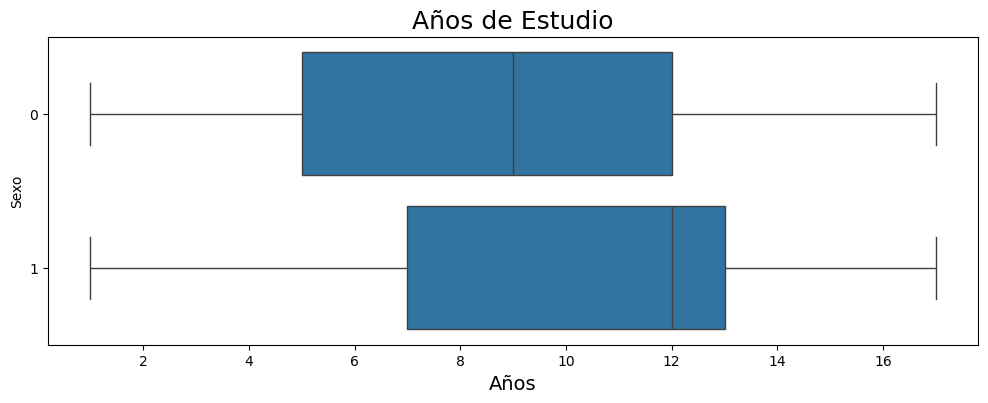

In [28]:
ax = sns.boxplot(x="Años de Estudio", y='Sexo', data=datos, orient="h")

ax.figure.set_size_inches(12, 4)
ax.set_title("Años de Estudio", fontsize=18)
ax.set_xlabel("Años", fontsize=14)
ax

El sexo femenino (1) tiene una mediana concentrada en 12 años de estudio mientras que los masculinos está mas cercana a los 9 años.

Si se cruza esto con los datos obtenidos de salario mínimo se podría concluir que las mujeres, a pesar de poder tener más años de estudios, tendrán un salario mínimo menor en comparación con los hombres.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1752-estadistica-con-python-parte1/img006.png' width='80%'>